In [170]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
from math import sqrt

In [171]:
df = pd.read_csv('C:/Users/prasanth/Desktop/outpatientdata2.csv',encoding='latin-1')

In [172]:
df.head()

,Name,Age,MobileNumber,Diseaserelatedtoear,Diseaserelatedtoeye,Diseaserelatedtoteeth,Patientdoesntappeared,Timetaken
0,bohemond,39,7751654875,0,1,0,0,3.25
1,bohen,50,8331177512,0,1,0,0,3.26
2,boheng,38,1564615646,0,1,0,0,4.00
3,bohl,53,1564234721,0,1,0,0,3.15
4,bohland,28,33840938409,0,1,0,0,4.32


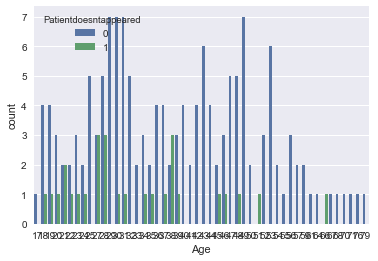

In [173]:
sns.countplot(x='Age', hue='Patientdoesntappeared', data=df);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000761BD1BAC8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000761C3C3160>]], dtype=object)

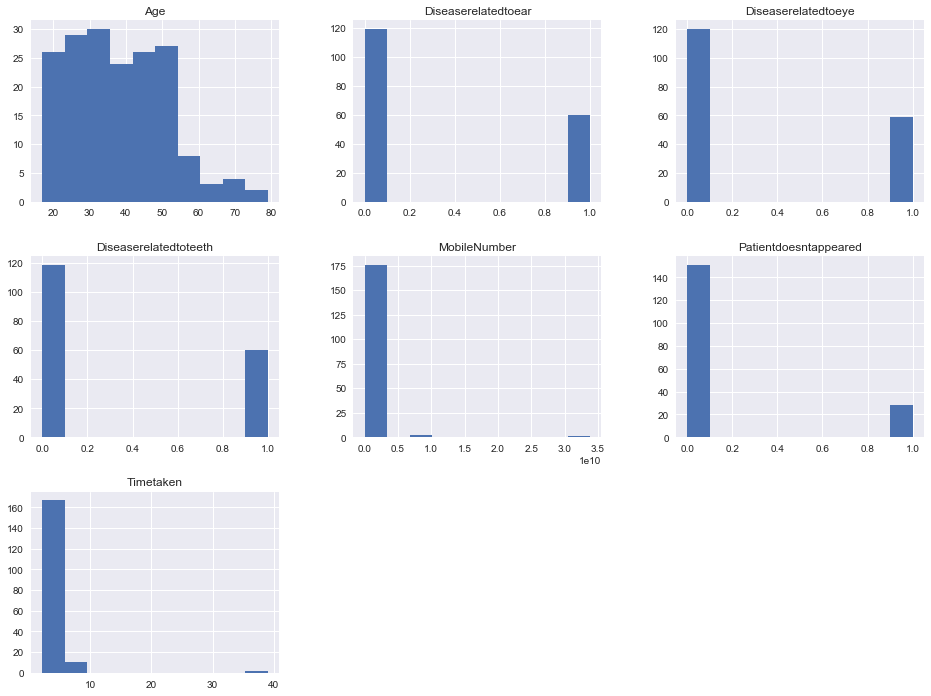

In [174]:
plt.rcParams['figure.figsize'] = (16,12)
df.drop(['Name'], axis = 1).hist()

In [175]:
df['Timetaken'].describe()

count    179.000000
mean       4.555330
std        3.808568
min        2.210000
25%        3.400000
50%        4.100000
75%        4.700000
max       39.000000
Name: Timetaken, dtype: float64

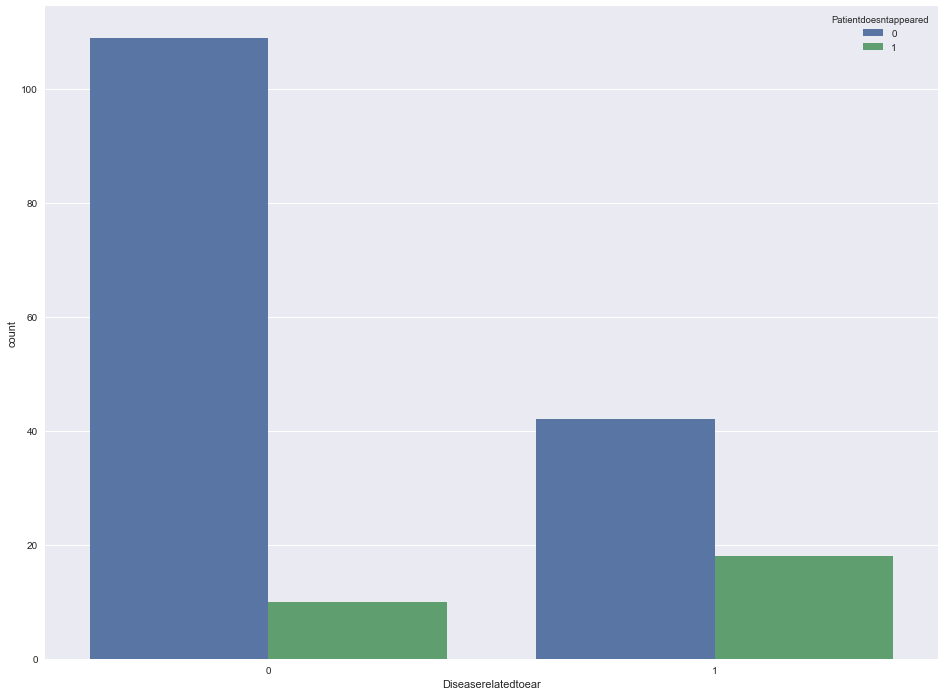

In [176]:
sns.countplot(x='Diseaserelatedtoear', hue='Patientdoesntappeared', data=df);

In [177]:
%matplotlib inline

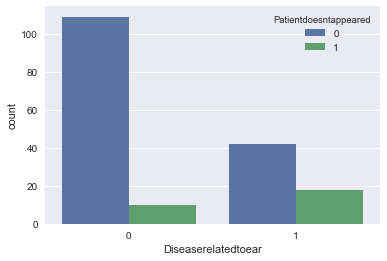

In [178]:
sns.countplot(x='Diseaserelatedtoear', hue='Patientdoesntappeared', data=df);

In [179]:
names = df['Name']
mobile = df['MobileNumber']
y = df['Patientdoesntappeared']
df.drop(['Name','MobileNumber','Patientdoesntappeared'], axis=1, inplace=True)

In [180]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

X_train, X_holdout, y_train, y_holdout = train_test_split(df.values, y, test_size=0.3,
random_state=17)

tree = RandomForestClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

tree.fit(X_train, y_train)

# for kNN, we need to scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [181]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from collections import Counter
from sklearn.model_selection import cross_val_score


tree_pred = tree.predict(X_holdout)
print(tree_pred)
print(Counter(tree_pred))

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse =  cross_val_score(lm, X_train, y_train, cv=10 , scoring = 'neg_mean_squared_error')  
print ("Mean of MSE: ", abs(mse.mean()))
rootMeanSquaredError = sqrt( abs(mse.mean()))
print ("RMSE:",rootMeanSquaredError)
print ("R Squared error =",r2_score(y_test,y))
confusion_matrix(y_holdout,tree_pred)
accuracy_score(y_holdout, tree_pred)

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Counter({0: 50, 1: 4})
Mean of MSE:  0.141297029131
RMSE: 0.375894970877379


ValueError: Found input variables with inconsistent numbers of samples: [36, 179]

In [182]:
tree =RandomForestClassifier()

In [183]:
tree.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [184]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
X=df.values
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3,
random_state=17)

tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

tree.fit(X_train, y_train)

# for kNN, we need to scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [157]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.cross_validation import*

from collections import Counter

tree_pred = tree.predict(X_holdout)
print(tree_pred)
print(Counter(tree_pred))

from sklearn.metrics import mean_squared_error
mse =  cross_val_score(lm, X_train, y_train, cv=10 , scoring = 'neg_mean_squared_error')  
print ("Mean of MSE: ", abs(mse.mean()))
rootMeanSquaredError = sqrt( abs(mse.mean()))
print ("RMSE:",rootMeanSquaredError) 


print(confusion_matrix(y_holdout,tree_pred))
print(accuracy_score(y_holdout, tree_pred))
print(precision_score(y_holdout,tree_pred))

[0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1]
Counter({0: 47, 1: 7})
Mean of MSE:  0.141297029131
RMSE: 0.375894970877379
[[39  4]
 [ 8  3]]
0.777777777778
0.428571428571


In [137]:
from sklearn.svm import LinearSVC
svc =LinearSVC()
svc.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [138]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
mse =  cross_val_score(lm, X_train, y_train, cv=10 , scoring = 'neg_mean_squared_error')  
print ("Mean of MSE: ", abs(mse.mean()))
rootMeanSquaredError = sqrt( abs(mse.mean()))
print ("RMSE:",rootMeanSquaredError)
accuracy = cross_val_score(svc, X_train, y_train,cv=10,scoring="accuracy")
print("Accuracy= ",accuracy_score(y_train,y1))




Mean of MSE:  0.149116020224
RMSE: 0.3861554353156396
Accuracy=  0.965034965035


In [139]:
dimensions =list(X_train)
weights =svc.coef_
weights=weights[0]
f= zip(weights, dimensions)
l=sorted(f, reverse=True)
l[:5]

[(0.36403195686573753, array([ 20. ,   0. ,   1. ,   0. ,   5.2])),
 (0.095380190785219254, array([ 23.,   0.,   1.,   0.,   4.])),
 (-0.006220111031192215, array([ 53.  ,   0.  ,   1.  ,   0.  ,   3.33])),
 (-0.01829898961277901, array([ 29.  ,   1.  ,   0.  ,   0.  ,   3.25])),
 (-0.53949931342222945, array([ 18. ,   0. ,   1. ,   0. ,   4.9]))]

In [140]:
significance = tree.feature_importances_
f=zip(significance, dimensions)
l=sorted(f, reverse=True)
l[:5]

[(0.43930825783832378, array([ 29.  ,   1.  ,   0.  ,   0.  ,   3.25])),
 (0.40471686422665859, array([ 53.  ,   0.  ,   1.  ,   0.  ,   3.33])),
 (0.070565909130080137, array([ 20. ,   0. ,   1. ,   0. ,   5.2])),
 (0.049279290829409142, array([ 18. ,   0. ,   1. ,   0. ,   4.9])),
 (0.036129677975528421, array([ 23.,   0.,   1.,   0.,   4.]))]

In [141]:
y1=tree.predict(X_train)

In [142]:
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score
print("Accuracy= ",accuracy_score(y_train,y1))
print("Precision= ",precision_score(y_train,y1)) 
print("Recall= ",recall_score(y_train,y1)) 
print("f1-score= ",f1_score(y_train,y1))

Accuracy=  0.979020979021
Precision=  1.0
Recall=  0.88
f1-score=  0.936170212766


In [123]:
dimensions= list(X)


In [124]:
tree.feature_importances_

array([ 0.41611761,  0.07834226,  0.02844217,  0.08783519,  0.38926277])

In [125]:
significance = tree.feature_importances_
f=zip(significance, dimensions)
l=sorted(f, reverse=True)
l[:5]

[(0.41611761265213792, array([ 39.  ,   0.  ,   1.  ,   0.  ,   3.25])),
 (0.38926277164631862, array([ 28.  ,   0.  ,   1.  ,   0.  ,   4.32])),
 (0.087835188618749824, array([ 53.  ,   0.  ,   1.  ,   0.  ,   3.15])),
 (0.078342258027691777, array([ 50.  ,   0.  ,   1.  ,   0.  ,   3.26])),
 (0.028442169055101885, array([ 38.,   0.,   1.,   0.,   4.]))]

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [179, 36]

In [127]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [128]:
from sklearn.metrics import mean_squared_error
mse =  cross_val_score(lm, X_train, y_train, cv=10, scoring = 'neg_mean_squared_error')  
print ("Mean of MSE: ", abs(mse.mean()))
rootMeanSquaredError = sqrt( abs(mse.mean()))
print ("RMSE:",rootMeanSquaredError)
from sklearn.model_selection import cross_val_score
accuracy =  cross_val_score(gnb, X_train, y_train, cv=10)
print("Accuracy= ",accuracy_score(y_test,y))


Mean of MSE:  0.149116020224
RMSE: 0.3861554353156396
Accuracy=  0.527777777778


In [129]:
import numpy as np

In [130]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train, y_train)
y=gnb.predict(X_test)

from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score
print("Accuracy= ",accuracy_score(y_test,y))
print("Precision= ",precision_score(y_test,y)) 
print("Recall= ",recall_score(y_test,y)) 
print("f1-score= ",f1_score(y_test,y))


Accuracy=  0.527777777778
Precision=  0.15
Recall=  1.0
f1-score=  0.260869565217


In [131]:
from sklearn.model_selection import cross_val_score
accuracy =  cross_val_score(gnb, X_train, y_train, cv=11)
precision =  cross_val_score(gnb, X_train, y_train, cv=11 , scoring = 'precision')
recall =  cross_val_score(gnb, X_train, y_train, cv=11 , scoring = 'recall')
print ("Mean Accuracy = ", accuracy.mean())
print ("Mean Recall = ", recall.mean())
print ("Mean Precision = ", precision.mean())
from sklearn.metrics import mean_squared_error
mse =  cross_val_score(lm, X_train, y_train, cv=11 , scoring = 'neg_mean_squared_error')  
print ("Mean of MSE: ", abs(mse.mean()))
rootMeanSquaredError = sqrt( abs(mse.mean()))
print ("RMSE:",rootMeanSquaredError)


Mean Accuracy =  0.477605727606
Mean Recall =  0.969696969697
Mean Precision =  0.251056014692
Mean of MSE:  0.170104723551
RMSE: 0.4124375389694852
